In [22]:
import pandas as pd

from sklearn.preprocessing import StandardScaler

In [23]:

df = pd.read_csv("cleaned_outliers.csv")

print("Dataset Loaded")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

Dataset Loaded
Shape: (66877, 22)
Columns: ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
   Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                0       1         0          1   26       0       0   
1                0       1         1          1   26       1       1   
2                0       0         0          1   26       0       0   
3                0       1         1          1   28       1       0   
4                0       0         0          1   29       1       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             1       0  ...              1   
1                     0             0       1  ...              1   
2                     0             1

In [24]:
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

In [25]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,1,8,5,8


In [26]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [27]:
scaler = StandardScaler()

In [28]:
X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [29]:
df_scaled = pd.concat([y, X_scaled], axis=1)

In [30]:
df_scaled.to_csv('Scaled_file.csv', index=False)

In [31]:
print(X_scaled[numeric_cols].mean())
print(X_scaled[numeric_cols].std())

HighBP                  1.087961e-16
HighChol                1.087961e-16
CholCheck              -2.719903e-16
BMI                     2.719903e-16
Smoker                  8.159708e-17
Stroke                  2.719903e-17
HeartDiseaseorAttack    1.359951e-17
PhysActivity            2.719903e-17
Fruits                 -6.119781e-17
Veggies                 1.359951e-17
HvyAlcoholConsump      -2.719903e-17
AnyHealthcare           8.499696e-17
NoDocbcCost            -5.779793e-17
GenHlth                 2.175922e-16
MentHlth                1.359951e-17
PhysHlth                4.079854e-17
DiffWalk                0.000000e+00
Sex                     5.779793e-17
Age                    -2.991893e-16
Education               2.447913e-16
Income                  1.359951e-17
dtype: float64
HighBP                  1.000007
HighChol                1.000007
CholCheck               1.000007
BMI                     1.000007
Smoker                  1.000007
Stroke                  1.000007
HeartDisea

In [32]:
#Data vizualisation
df_scaled.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0.878394,-1.058706,0.161697,-0.562619,-0.966976,-0.259816,-0.420366,0.648364,-1.245821,...,0.218035,-0.321896,0.146038,0.156985,2.427395,-0.572188,1.081467,-1.615731,1.062065,1.069943
1,0,0.878394,0.944550,0.161697,-0.562619,1.034152,3.848883,-0.420366,-1.542343,0.802683,...,0.218035,-0.321896,0.146038,-0.459628,-0.574924,-0.572188,1.081467,1.174835,1.062065,1.069943
2,0,-1.138441,-1.058706,0.161697,-0.562619,-0.966976,-0.259816,-0.420366,0.648364,0.802683,...,0.218035,-0.321896,-1.667290,-0.459628,0.425849,-0.572188,1.081467,1.523655,1.062065,1.069943
3,0,0.878394,0.944550,0.161697,-0.212509,1.034152,-0.259816,-0.420366,0.648364,0.802683,...,0.218035,-0.321896,0.146038,-0.459628,-0.274692,-0.572188,1.081467,0.826014,1.062065,1.069943
4,0,-1.138441,-1.058706,0.161697,-0.037455,1.034152,-0.259816,-0.420366,0.648364,0.802683,...,0.218035,-0.321896,-0.760626,-0.459628,-0.574924,-0.572188,1.081467,-0.220448,0.089842,1.069943


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

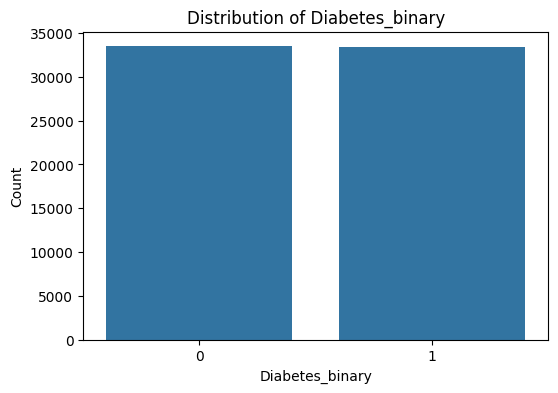

In [34]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes_binary', data=df_scaled)
plt.title('Distribution of Diabetes_binary')
plt.xlabel('Diabetes_binary')
plt.ylabel('Count')
plt.show()

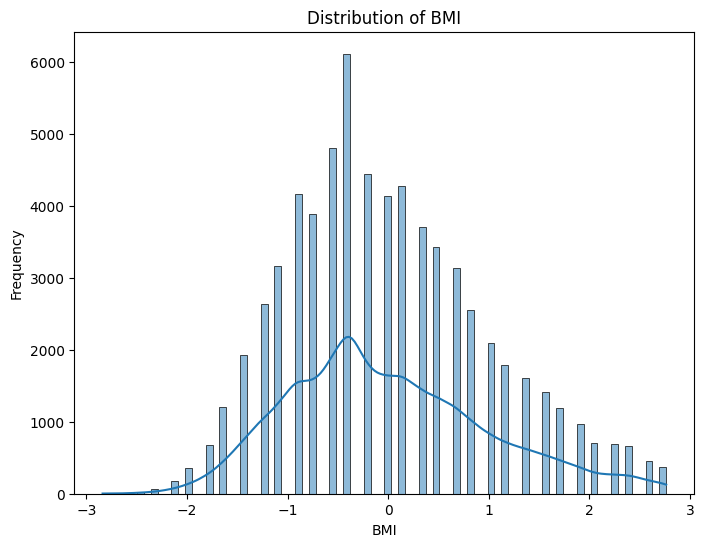

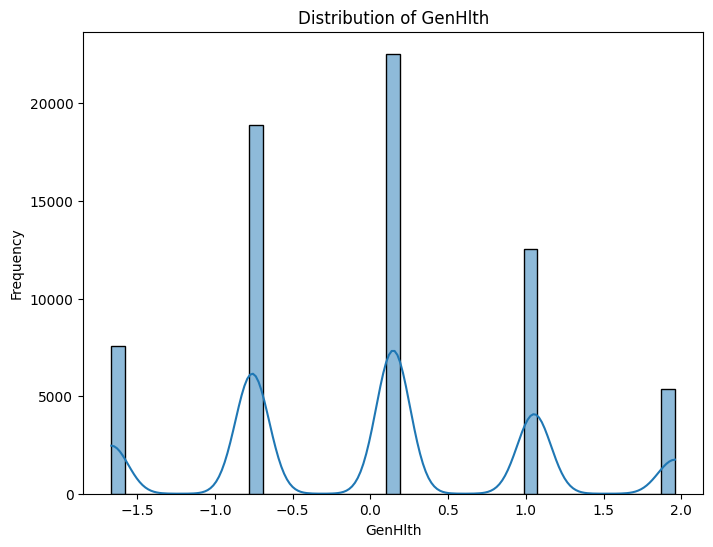

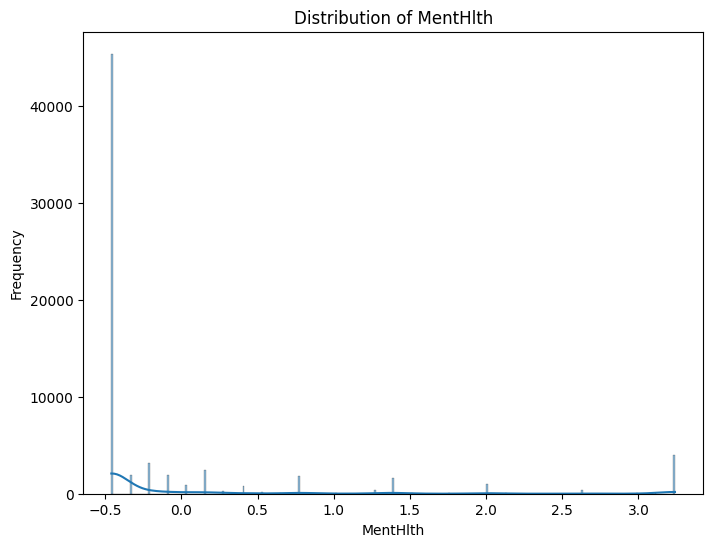

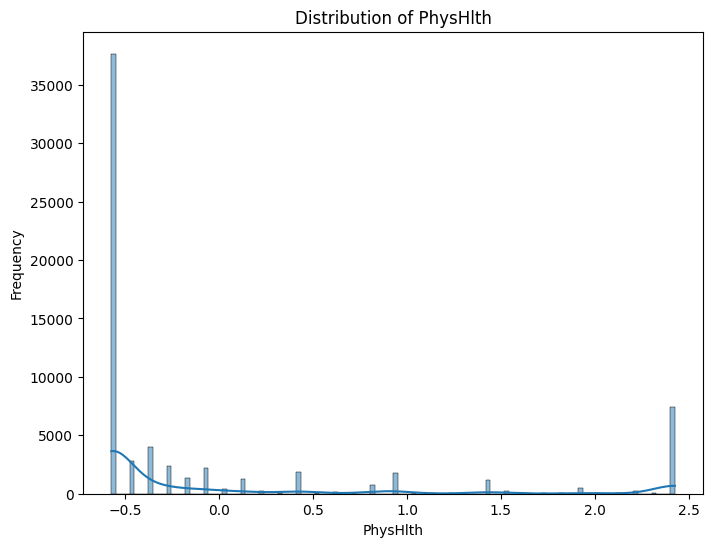

In [35]:
selected_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth']

for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_scaled, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

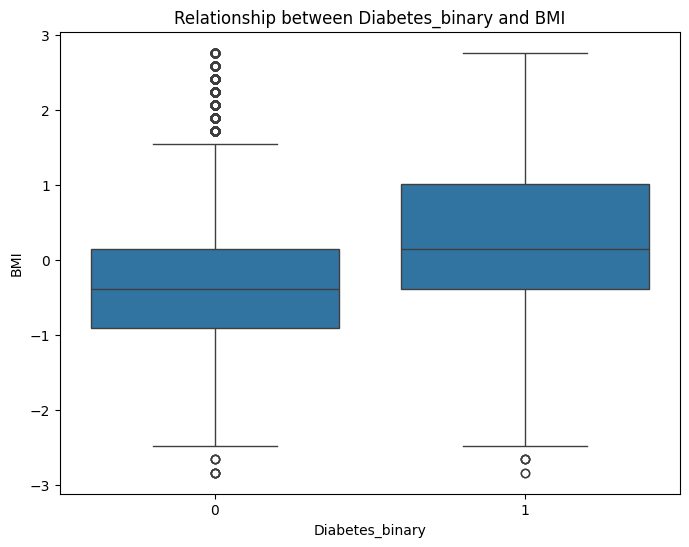

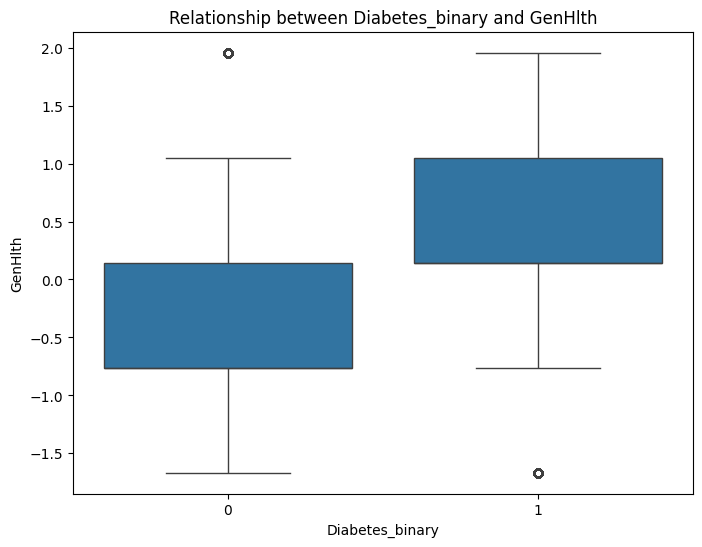

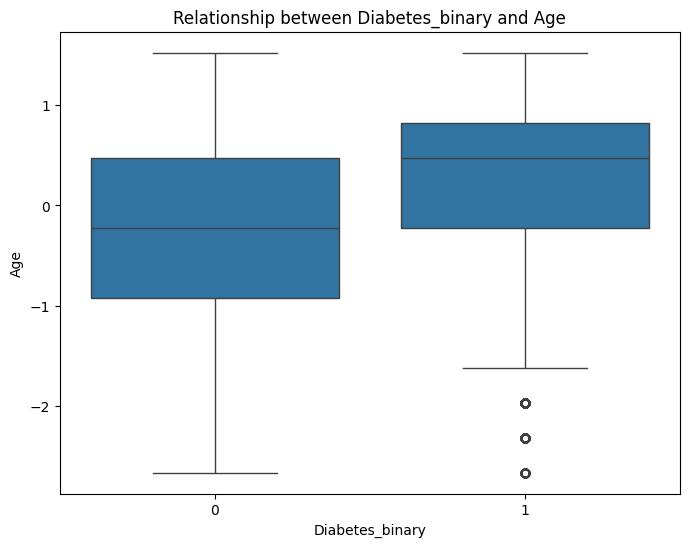

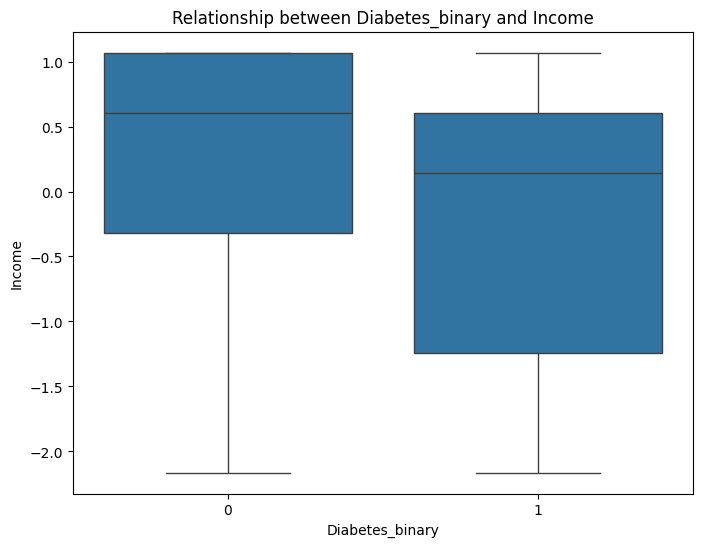

In [36]:
selected_features_for_relationship = ['BMI', 'GenHlth', 'Age', 'Income']

for feature in selected_features_for_relationship:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Diabetes_binary', y=feature, data=df_scaled)
    plt.title(f'Relationship between Diabetes_binary and {feature}')
    plt.xlabel('Diabetes_binary')
    plt.ylabel(feature)
    plt.show()